In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
test=pd.read_csv("SalaryData_Test.csv")
train=pd.read_csv("SalaryData_Train.csv")

In [4]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
test.shape

(15060, 14)

In [8]:
train.shape

(30161, 14)

In [9]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
-

In [10]:
train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [40]:
train.occupation.unique()

array([ 0,  3,  5,  9,  7, 11, 13,  4,  6, 12,  2, 10,  1,  8])

In [41]:
train.occupation.value_counts()

9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1965
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: occupation, dtype: int64

In [11]:
train['workclass']=train['workclass'].astype('category')
train['education']=train['education'].astype('category')
train['maritalstatus']=train['maritalstatus'].astype('category')
train['occupation']=train['occupation'].astype('category')
train['relationship']=train['relationship'].astype('category')
train['race']=train['race'].astype('category')
train['native']=train['native'].astype('category')
train['sex']=train['sex'].astype('category')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            30161 non-null  int64   
 1   workclass      30161 non-null  category
 2   education      30161 non-null  category
 3   educationno    30161 non-null  int64   
 4   maritalstatus  30161 non-null  category
 5   occupation     30161 non-null  category
 6   relationship   30161 non-null  category
 7   race           30161 non-null  category
 8   sex            30161 non-null  category
 9   capitalgain    30161 non-null  int64   
 10  capitalloss    30161 non-null  int64   
 11  hoursperweek   30161 non-null  int64   
 12  native         30161 non-null  category
 13  Salary         30161 non-null  object  
dtypes: category(8), int64(5), object(1)
memory usage: 1.6+ MB


In [13]:
from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

In [14]:
train['workclass'] = label_encoder.fit_transform(train['workclass'])
train['education'] = label_encoder.fit_transform(train['education'])
train['maritalstatus'] = label_encoder.fit_transform(train['maritalstatus'])
train['occupation'] = label_encoder.fit_transform(train['occupation'])
train['relationship'] = label_encoder.fit_transform(train['relationship'])
train['race'] = label_encoder.fit_transform(train['race'])
train['sex'] = label_encoder.fit_transform(train['sex'])
train['native'] = label_encoder.fit_transform(train['native'])

In [15]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='education'>

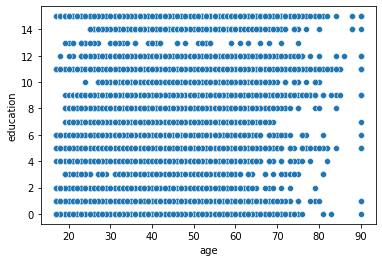

In [16]:
sns.scatterplot(train.age,train.education)

/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='maritalstatus'>

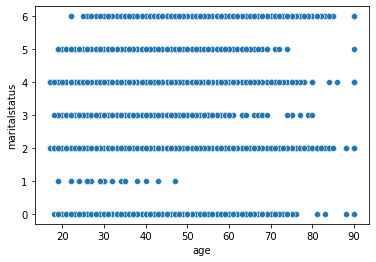

In [17]:
sns.scatterplot(train.age,train.maritalstatus)

/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='race'>

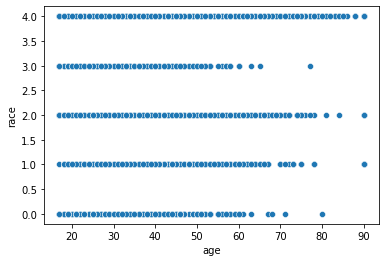

In [18]:
sns.scatterplot(train.age,train.race)

In [19]:
test['workclass']=test['workclass'].astype('category')
test['education']=test['education'].astype('category')
test['maritalstatus']=test['maritalstatus'].astype('category')
test['occupation']=test['occupation'].astype('category')
test['relationship']=test['relationship'].astype('category')
test['race']=test['race'].astype('category')
test['native']=test['native'].astype('category')
test['sex']=test['sex'].astype('category')

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            15060 non-null  int64   
 1   workclass      15060 non-null  category
 2   education      15060 non-null  category
 3   educationno    15060 non-null  int64   
 4   maritalstatus  15060 non-null  category
 5   occupation     15060 non-null  category
 6   relationship   15060 non-null  category
 7   race           15060 non-null  category
 8   sex            15060 non-null  category
 9   capitalgain    15060 non-null  int64   
 10  capitalloss    15060 non-null  int64   
 11  hoursperweek   15060 non-null  int64   
 12  native         15060 non-null  category
 13  Salary         15060 non-null  object  
dtypes: category(8), int64(5), object(1)
memory usage: 827.6+ KB


In [21]:
test['workclass'] = label_encoder.fit_transform(test['workclass'])
test['education'] = label_encoder.fit_transform(test['education'])
test['maritalstatus'] = label_encoder.fit_transform(test['maritalstatus'])
test['occupation'] = label_encoder.fit_transform(test['occupation'])
test['relationship'] = label_encoder.fit_transform(test['relationship'])
test['race'] = label_encoder.fit_transform(test['race'])
test['sex'] = label_encoder.fit_transform(test['sex'])
test['native'] = label_encoder.fit_transform(test['native'])

In [22]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [23]:
train['Salary'] = label_encoder.fit_transform(train['Salary'])
test['Salary'] = label_encoder.fit_transform(test['Salary'])

In [24]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [25]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [26]:
trainx=train.iloc[:,0:13]
trainy=train.iloc[:,13]
testx=test.iloc[:,0:13]
testy=test.iloc[:,13]

<AxesSubplot:>

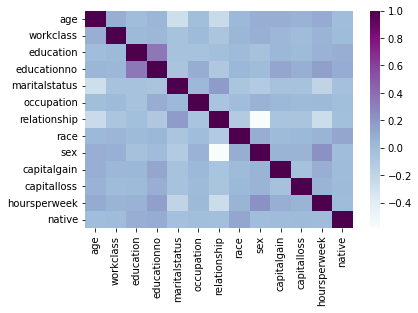

In [27]:
sns.heatmap(trainx.corr(),cmap="BuPu")

<AxesSubplot:>

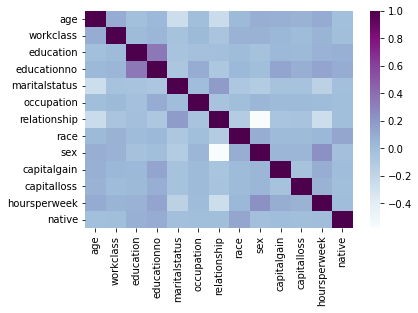

In [28]:
sns.heatmap(testx.corr(),cmap="BuPu")

In [29]:
trainx.shape ,trainy.shape, testx.shape, testy.shape

((30161, 13), (30161,), (15060, 13), (15060,))

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gnb = GaussianNB()

In [32]:
gnb.fit(trainx,trainy)

GaussianNB()

In [33]:
y_pred = gnb.predict(testx)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [34]:
acc = accuracy_score(testy, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 79.46879150066401


In [35]:

print('Training set score: {:.3f}'.format(gnb.score(trainx, trainy)))

print('Test set score: {:.3f}'.format(gnb.score(testx, testy)))

Training set score: 0.795
Test set score: 0.795


In [36]:
pd.crosstab(y_pred,testy)

Salary,0,1
row_0,,
0,10759,2491
1,601,1209


In [37]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testy, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10759   601]
 [ 2491  1209]]

True Positives(TP) =  10759

True Negatives(TN) =  1209

False Positives(FP) =  601

False Negatives(FN) =  2491


<AxesSubplot:>

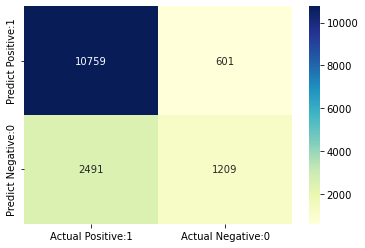

In [39]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
